In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('final_dataset_BFP .csv')
df

,Weight,Height,BMI,Body Fat Percentage,BFPcase,Gender,Age,BMIcase,Exercise Recommendation Plan
0,76.811975,1.820521,23.175956,18.281148,Acceptable,Male,29,normal,4
1,77.721154,1.945498,20.534184,13.731021,Fitness,Male,23,normal,4
2,87.558726,1.742754,28.828859,42.304631,Obese,Female,57,over weight,5
3,89.473356,1.758318,28.940017,27.958021,Obese,Male,41,over weight,5
4,69.963943,1.722570,23.578732,16.464478,Fitness,Male,19,normal,4
...,...,...,...,...,...,...,...,...,...
4995,87.003054,1.902891,24.027404,16.772884,Fitness,Male,18,normal,4
4996,92.121555,1.779346,29.096464,30.215757,Obese,Male,50,over weight,5
4997,105.298845,1.972883,27.053345,31.214014,Obese,Male,65,over weight,5
4998,90.411999,1.803409,27.799528,29.579434,Obese,Male,54,over weight,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Weight                        5000 non-null   float64
 1   Height                        5000 non-null   float64
 2   BMI                           5000 non-null   float64
 3   Body Fat Percentage           5000 non-null   float64
 4   BFPcase                       5000 non-null   object 
 5   Gender                        5000 non-null   object 
 6   Age                           5000 non-null   int64  
 7   BMIcase                       5000 non-null   object 
 8   Exercise Recommendation Plan  5000 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 351.7+ KB


In [ ]:
df.columns

Index(['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'BFPcase', 'Gender',
       'Age', 'BMIcase', 'Exercise Recommendation Plan'],
      dtype='object')

In [ ]:
df['BMIcase'].replace({'sever thinness':-3, 'moderate thinness':-2, 'mild thinness':-1, 'normal':0, 'over weight':1, 'obese':2, 'severe obese':3}, inplace=True)
df['BMIcase'].value_counts()

<ipython-input-5-1c52d50629f1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMIcase'].replace({'sever thinness':-3, 'moderate thinness':-2, 'mild thinness':-1, 'normal':0, 'over weight':1, 'obese':2, 'severe obese':3}, inplace=True)
<ipython-input-5-1c52d50629f1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_do

,count
BMIcase,
0,1458
1,1230
3,860
2,843
-1,263
-3,211
-2,135


Text(0, 0.5, 'Count')

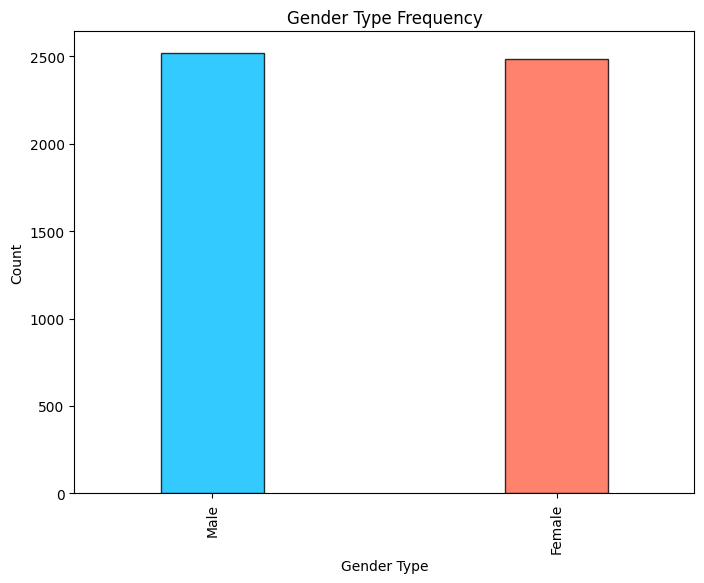

In [ ]:
# 막대 그래프 너비 조정

plt.figure(figsize=(8, 6))
colors = ['deepskyblue', 'tomato']
df['Gender'].value_counts().plot(kind='bar', color=colors, edgecolor='black', width = 0.3, alpha = 0.8)
plt.title('Gender Type Frequency')
plt.xlabel('Gender Type')
plt.ylabel('Count')

In [ ]:
df['BFPcase'].replace({'Athletes':-2, 'Fitness':-1, 'Acceptable':1, 'Obese':2}, inplace=True)
df['BFPcase'].value_counts()

<ipython-input-7-a545dd4386d2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BFPcase'].replace({'Athletes':-2, 'Fitness':-1, 'Acceptable':1, 'Obese':2}, inplace=True)
<ipython-input-7-a545dd4386d2>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BFPcase'].replace({'Athletes':-2, 'Fitness

,count
BFPcase,
2,3033
1,1196
-1,468
-2,303


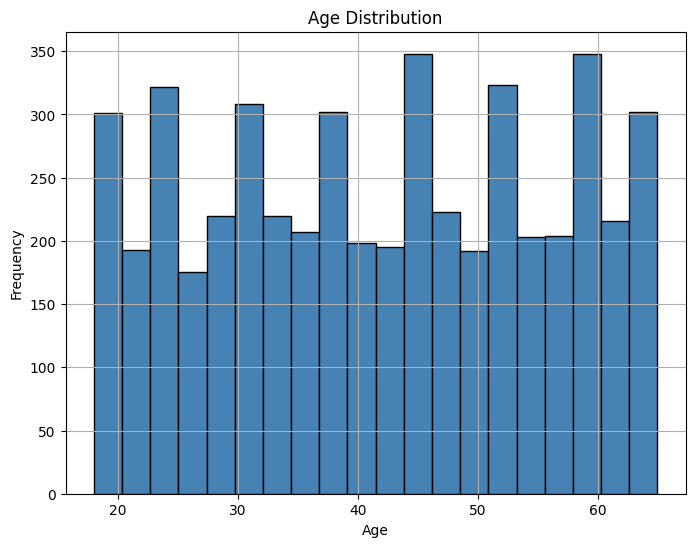

<ipython-input-8-dc07b39dc805>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exercise Recommendation Plan', y='BMI', data=df, palette='Set2')


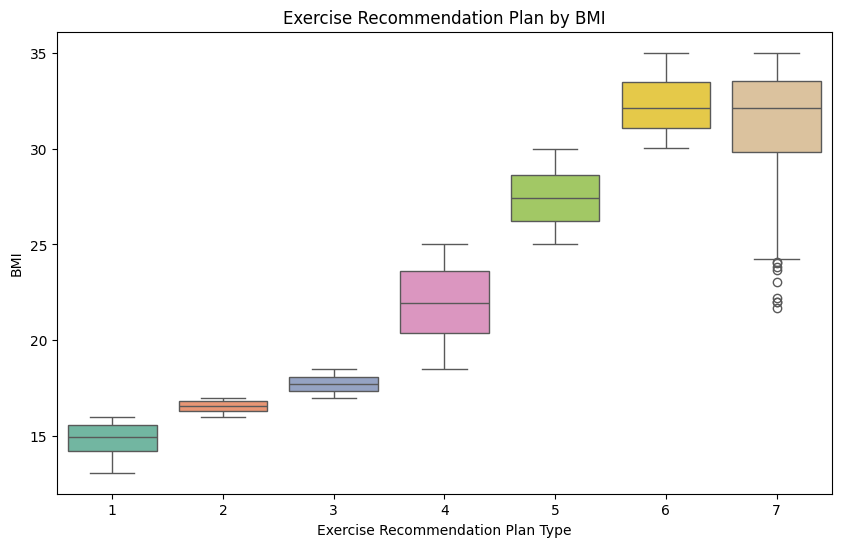

<ipython-input-8-dc07b39dc805>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exercise Recommendation Plan', y='Weight', data=df, palette='Set2')


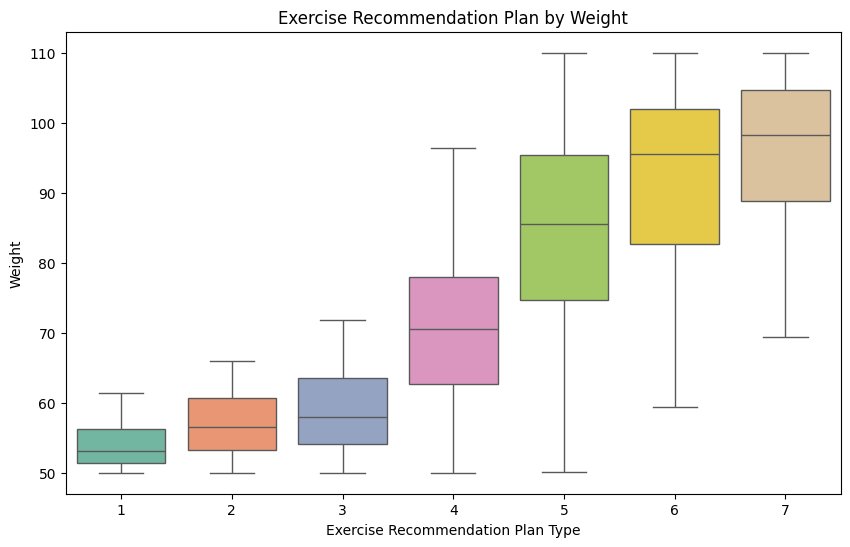

In [ ]:
plt.figure(figsize=(8, 6))
df['Age'].hist(bins=20, color='steelblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Exercise Recommendation Plan by BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exercise Recommendation Plan', y='BMI', data=df, palette='Set2')
plt.title('Exercise Recommendation Plan by BMI')
plt.xlabel('Exercise Recommendation Plan Type')
plt.ylabel('BMI')
plt.show()

# Exercise Recommendation Plan by Weight
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exercise Recommendation Plan', y='Weight', data=df, palette='Set2')
plt.title('Exercise Recommendation Plan by Weight')
plt.xlabel('Exercise Recommendation Plan Type')
plt.ylabel('Weight')
plt.show()

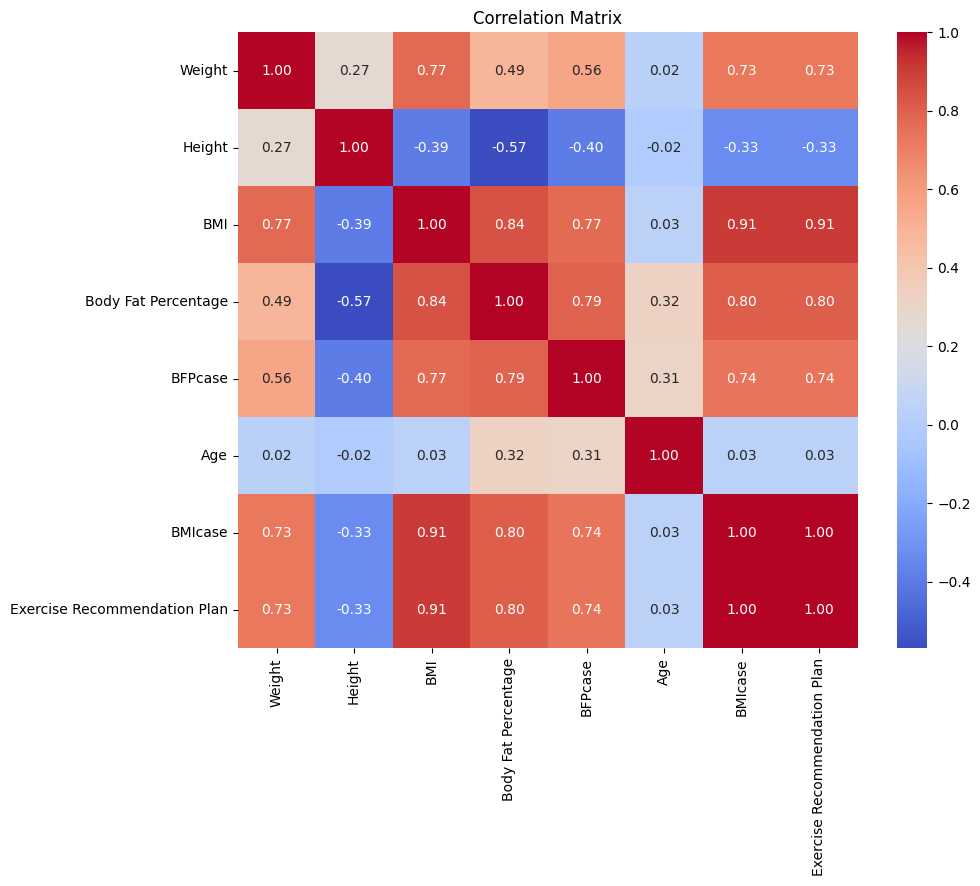

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#수정

In [ ]:
data = pd.read_csv("final_dataset_BFP .csv")
data

,Weight,Height,BMI,Body Fat Percentage,BFPcase,Gender,Age,BMIcase,Exercise Recommendation Plan
0,76.811975,1.820521,23.175956,18.281148,Acceptable,Male,29,normal,4
1,77.721154,1.945498,20.534184,13.731021,Fitness,Male,23,normal,4
2,87.558726,1.742754,28.828859,42.304631,Obese,Female,57,over weight,5
3,89.473356,1.758318,28.940017,27.958021,Obese,Male,41,over weight,5
4,69.963943,1.722570,23.578732,16.464478,Fitness,Male,19,normal,4
...,...,...,...,...,...,...,...,...,...
4995,87.003054,1.902891,24.027404,16.772884,Fitness,Male,18,normal,4
4996,92.121555,1.779346,29.096464,30.215757,Obese,Male,50,over weight,5
4997,105.298845,1.972883,27.053345,31.214014,Obese,Male,65,over weight,5
4998,90.411999,1.803409,27.799528,29.579434,Obese,Male,54,over weight,5


In [ ]:
data['Gender'].replace({'Male':-1, 'Female':1}, inplace=True)
data['BFPcase'].replace({'Athletes':-2, 'Fitness':-1, 'Acceptable':1, 'Obese':2}, inplace=True)

<ipython-input-11-c401d06e5114>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].replace({'Male':-1, 'Female':1}, inplace=True)
<ipython-input-11-c401d06e5114>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'].replace({'Male':-1, 'Female':1}, inplace=True)
<ipython-input

In [ ]:
data=data.round()

##선형회귀

In [ ]:
y = data['Exercise Recommendation Plan']
X = data.drop(columns = ['Exercise Recommendation Plan', 'BMIcase'])

In [ ]:
X.columns

Index(['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'BFPcase', 'Gender',
       'Age'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(f'Training R^2: {model.score(X_train, y_train)}')
print(f'Test R^2: {model.score(X_test, y_test)}')

Training R^2: 0.8417856222356946
Test R^2: 0.8507874628065005


In [ ]:
result = model.fit(X_train, y_train)
W = result.coef_      #추정된 가중치
b = result.intercept_      #추정된 바이어스
print("모델: [w b] = [%.4f %.4f]" %(W[0],b))
print(W)

모델: [w b] = [0.0177 0.0666]
[ 0.01767026  0.06949762  0.04306244  0.10253462  0.08956979 -0.30164878
 -0.02515244]


In [ ]:
Age = 29  # @param {"type":"number"}
Weight_kg = 76  # @param {"type":"number"}
Height_cm = 182  # @param {"type":"number"}
Height_m = Height_cm / 100
# BMI 계산
BMI_kg_cm2 = Weight_kg / (Height_m ** 2)
BFP = 18  # @param {"type":"number"}
BFPcase = 2  # @param {"type":"number"}
Gender = "Male" # @param {"type":"string"}
if Gender == 'Female' or Gender == 'female':
    Gender = 0
elif Gender == 'Male' or Gender == 'male':
    Gender = 1
else:
    raise ValueError("Who are you?  Please enter the correct gender.")
print(BMI_kg_cm2)
data=[[57,1.91,15,13,-1,-1,48]]
x=pd.DataFrame(data,columns=['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'BFPcase', 'Gender','Age'])
x = pd.DataFrame(data, columns=['Weight', 'Height', 'BMI', 'Body Fat Percentage', 'BFPcase', 'Gender', 'Age'])
x = x[X_train.columns]
print(x)
print(X_train.iloc[0:1])
print(model.predict(x))
model.predict(X_train.iloc[0:1])

22.944088878154812
   Weight  Height  BMI  Body Fat Percentage  BFPcase  Gender  Age
0      57    1.91   15                   13       -1      -1   48
      Weight  Height   BMI  Body Fat Percentage  BFPcase  Gender  Age
4227    57.0     2.0  16.0                 14.0       -1      -1   48
[2.19018333]


array([2.34203518])

##사용자

In [ ]:
data

[[57, 1.91, 15, 13, -1, -1, 48]]

In [ ]:
bmi_stats = df.groupby('BMIcase')['BMI'].agg(['min', 'max'])

print(bmi_stats)

# 'sever thinness': ~15.9, 'moderate thinness': 16~16.9, 'mild thinness': 16.9~17, 'normal':17~18.49, 'over weight': 18.5~24.9, 'obese': 25~29.9, 'severe obese':30~

               min        max
BMIcase                      
-3       13.099716  15.998638
-2       16.003463  16.999018
-1       17.003657  18.495445
 0       18.506849  24.998561
 1       25.003624  29.975572
 2       30.010406  34.985300
 3       21.706825  34.996928


In [ ]:
bfp_state = data.groupby('BFPcase')['Body Fat Percentage'].agg(['min', 'max'])
bfp_state

AttributeError: 'list' object has no attribute 'groupby'

In [ ]:
data_girl = data[data['Gender'] == 1]
data_boy = data[data['Gender'] == -1]

bfp_stats1 = data_girl.groupby('BFPcase')['Body Fat Percentage'].agg(['min', 'max'])
print(bfp_stats1)

TypeError: list indices must be integers or slices, not str

In [ ]:
bfp_stats2 = data_boy.groupby('BFPcase')['Body Fat Percentage'].agg(['min', 'max'])
print(bfp_stats2)

In [ ]:
# 사용자 데이터 입력 받고 수정
user_data = input("몸무게(kg), 키(cm), 성별(Female, Male), 나이를 쉼표 없이 띄어쓰기로 구분하여 입력하세요")
user_height = int(user_data[3:6]) / 100
user_age = int(user_data[14:])
if user_data[7:13] == 'Female':
    user_gender = 1
else:
    user_gender = -1
print("몸무게 %f kg, 키 %f m, 성별 %f, 나이 %f세" %(int(user_data[:2]), user_height, int(user_gender), user_age))
# user_weight : 몸무게(kg)   , user_height : 키(m),   int(user_gender) : 성별(-1, 1)

# 'sever thinness': ~15.9, 'moderate thinness': 16~16.9, 'mild thinness': 16.9~17, 'normal':17~18.49, 'over weight': 18.5~24.9, 'obese': 25~29.9, 'severe obese':30~
# 사용자 데이터 기반으로 나머지 항목(Exercise Recommendation Plan) 빼고 구하기
user_weight = int(user_data[:2])
user_gender = int(user_gender)
bmi = user_weight / (user_height ** 2) #bmi, bmicase
if bmi < 16:
    BMIcase = -3
elif 16 <= bmi < 16.9:
    BMIcase = -2
elif 16.9 <= bmi < 17:
    BMIcase = -1
elif 17 <= bmi < 18.5:
    BMIcase = 0
elif 18.5 <= bmi < 25:
    BMIcase = 1
elif 25 <= bmi < 30:
    BMIcase = 2
elif 30 <= bmi:
    BMIcase = 3

# 체지방률 = (1.2 * bmi) + (0.23 * 나이) - (10.8 * 성별) - 5.4
# 성별 (남자: 1, 여자: 0)

if user_gender == 1:
    user_bfp = (1.2 * bmi) + (0.23 * user_age) - 5.4
    if user_bfp < 20:
        user_bfpcase = -2
    elif 20 <= user_bfp < 24:
        user_bfpcase = -1
    elif 24 <= user_bfp < 31:
        user_bfpcase = 1
    else:
        user_bfpcase = 2
else:
    user_bfp = (1.2 * bmi) + (0.23 * user_age) - (10.8 * 1) - 5.4
    if user_bfp < 13:
        user_bfpcase = -2
    elif 13 <= user_bfp < 17:
        user_bfpcase = -1
    elif 17 <= user_bfp < 24:
        user_bfpcase = 1
    else:
        user_bfpcase = 2


new_data = pd.read_csv('final_dataset_BFP .csv')

new_row = {"Weight": int(user_data[:2]), "Height": user_height, "BMI": bmi, "Gender": int(user_gender), "BMIcase": BMIcase, "Age": user_age, "Body Fat Percentage": user_bfp, "BFPcase": user_bfpcase}
new_data = pd.DataFrame
([data, pd.DataFrame([new_row])], ignore_index==True)

new_data.iloc[-1]

몸무게(kg), 키(cm), 성별(Female, Male), 나이를 쉼표 없이 띄어쓰기로 구분하여 입력하세요50 150 Female 15
몸무게 50.000000 kg, 키 1.500000 m, 성별 1.000000, 나이 15.000000세


NameError: name 'ignore_index' is not defined

In [ ]:
predicted_plan

In [ ]:
figsize = (12, 1.2 * len(data_boy['BMIcase'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_girl, x='Body Fat Percentage', y='BMIcase', inner='box', palette=('salmon', 'coral', 'orange', 'khaki', 'yellowgreen', 'mediumturquoise', 'royalblue'))
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
figsize = (12, 1.2 * len(data_girl['BMIcase'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_girl, x='Body Fat Percentage', y='BMIcase', inner='box', palette=('salmon', 'coral', 'orange', 'khaki', 'yellowgreen', 'mediumturquoise', 'royalblue'))
sns.despine(top=True, right=True, bottom=True, left=True)